In [1]:
import plotly.express as px

gapminder = px.data.gapminder()
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


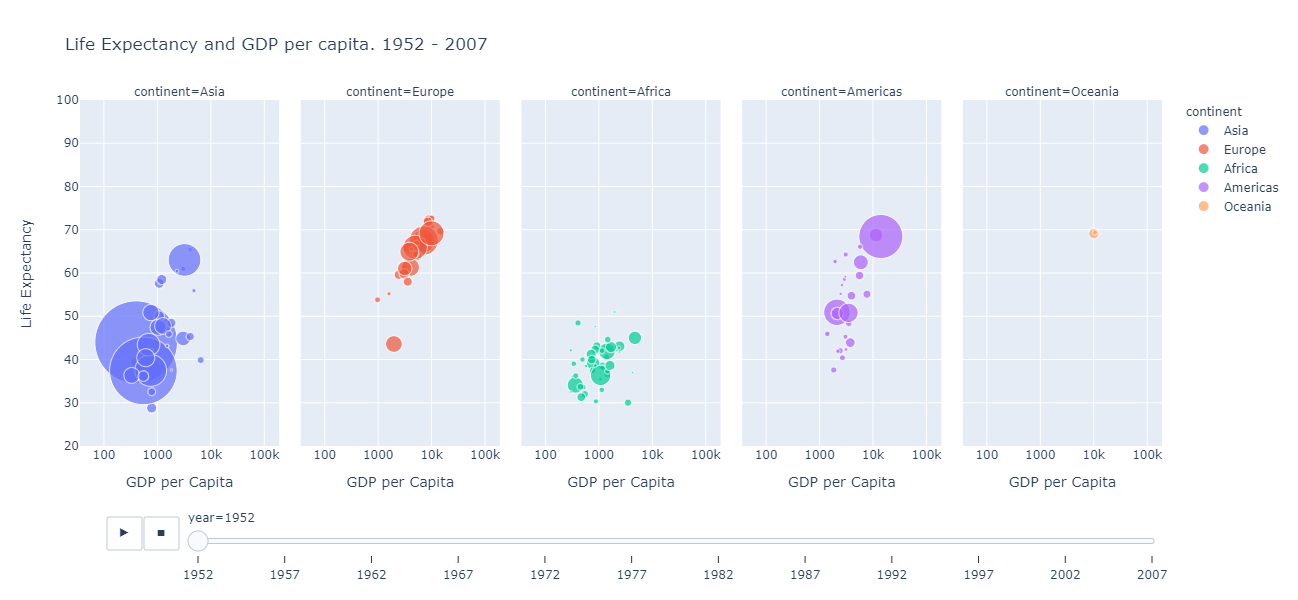

In [11]:
px.scatter(data_frame=gapminder,
           x='gdpPercap',
           y='lifeExp',
           size='pop',
           facet_col='continent',
#            facet_row='continent',
           color='continent',
           title='Life Expectancy and GDP per capita. 1952 - 2007',
           labels={'gdpPercap': 'GDP per Capita',
                   'lifeExp': 'Life Expectancy'},
           log_x=True,
           range_y=[20, 100],
           hover_name='country',
           animation_frame='year',
           height=600,
           size_max=90
          )

In [13]:
import os
import pandas as pd
pd.options.display.max_columns = None
os.listdir('../data/')

['lat_long.csv',
 'PovStatsCountry-Series.csv',
 'PovStatsData.csv',
 'PovStatsFootNote.csv',
 'PovStatsSeries.csv',
 'poverty.csv',
 'PovStatsCountry.csv']

In [15]:
series = pd.read_csv('../data/PovStatsSeries.csv')
print(series.shape)
series.head()

(64, 21)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,SI.DST.02ND.20,Poverty: Income distribution,Income share held by second 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group's goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
1,SI.DST.03RD.20,Poverty: Income distribution,Income share held by third 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group's goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
2,SI.DST.04TH.20,Poverty: Income distribution,Income share held by fourth 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group’s goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
3,SI.DST.05TH.20,Poverty: Income distribution,Income share held by highest 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group’s goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
4,SI.DST.10TH.10,Poverty: Income distribution,Income share held by highest 10%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group’s goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN


In [16]:
series['Topic'].value_counts()

Poverty: Poverty rates           45
Poverty: Shared prosperity       10
Poverty: Income distribution      8
Health: Population: Structure     1
Name: Topic, dtype: int64

In [17]:
series['Unit of measure'].value_counts(dropna=False)

%             39
NaN           22
2011 PPP $     3
Name: Unit of measure, dtype: int64

In [20]:
(series
.groupby('Topic')
['Limitations and exceptions']
.agg(['count', pd.Series.nunique])
.style.set_caption('Limitations and Exceptions'))

,count,nunique
Topic,,
Health: Population: Structure,1,1
Poverty: Income distribution,8,2
Poverty: Poverty rates,25,3
Poverty: Shared prosperity,4,2


In [22]:
series['Short definition'].notna().apply(['sum', 'mean'])

sum     21.000000
mean     0.328125
Name: Short definition, dtype: float64

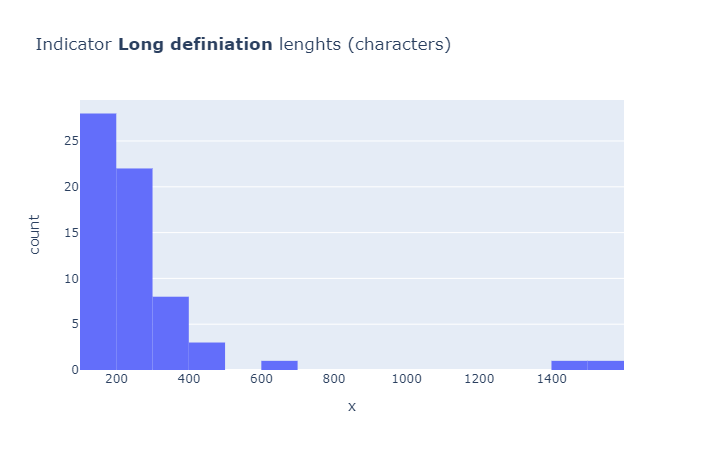

In [24]:
px.histogram(x=series['Long definition'].str.len(),
           title='Indicator <b>Long definiation</b> lenghts (characters)')

In [25]:
country = pd.read_csv('../data/PovStatsCountry.csv', na_values='', keep_default_na=False)
print(country.shape)
country.head()

(184, 31)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2011,BPM6,Actual,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,1971–84; 2012-15,NaN,BPM6,Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2016",Yes,2008,2002.0,2017.0,NaN
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Upper middle income,AM,Original chained constant price data are resca...,2012,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,1990–95,2011,BPM6,Actual,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2016",Yes,2014,NaN,2017.0,NaN


In [28]:
country['Region'].value_counts(dropna=False).to_frame().style.background_gradient('cividis')

,Region
Europe & Central Asia,49
Sub-Saharan Africa,47
Latin America & Caribbean,25
East Asia & Pacific,24
nan,15
Middle East & North Africa,14
South Asia,8
North America,2


In [29]:
country['Income Group'].value_counts(dropna=False)

Upper middle income    52
Lower middle income    47
High income            41
Low income             29
NaN                    15
Name: Income Group, dtype: int64

In [30]:
country['is_country'] = country['Region'].notna()

In [31]:
country

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30,is_country
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN,True
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2011,BPM6,Actual,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN,True
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN,True
3,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,1971–84; 2012-15,NaN,BPM6,Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey, 2011/12","Integrated household survey (IHS), 2016",Yes,2008,2002.0,2017.0,NaN,True
4,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Upper middle income,AM,Original chained constant price data are resca...,2012,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,1990–95,2011,BPM6,Actual,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2016",Yes,2014,NaN,2017.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,Original chained constant price data are resca...,2008,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Actual,NaN,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN,True
180,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,NaN,Middle East & North Africa,Low income,RY,1990,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2011,BPM5 (Converted into BPM6 by IMF),Actual,Special trade system,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2

In [32]:
country[country['Region'].isna()]['Short Name']

37     IDA countries classified as fragile situations
42                                East Asia & Pacific
43                              Europe & Central Asia
50           Fragile and conflict affected situations
70                                          IDA total
92                          Latin America & Caribbean
93                                         Low income
95                                Lower middle income
96                                Low & middle income
105                        Middle East & North Africa
107                                     Middle income
139                                        South Asia
147                                Sub-Saharan Africa
170                               Upper middle income
177                                             World
Name: Short Name, dtype: object

In [34]:
country['Region'].value_counts(dropna=False).to_frame()

,Region
Europe & Central Asia,49
Sub-Saharan Africa,47
Latin America & Caribbean,25
East Asia & Pacific,24
NaN,15
Middle East & North Africa,14
South Asia,8
North America,2


In [35]:
country['is_country'] = country['Region'].notna()
country[['Short Name', 'Region', 'is_country']].sample(10)

,Short Name,Region,is_country
176,Vanuatu,East Asia & Pacific,True
14,Bosnia and Herzegovina,Europe & Central Asia,True
79,Jamaica,Latin America & Caribbean,True
89,Lebanon,Middle East & North Africa,True
99,Luxembourg,Europe & Central Asia,True
108,North Macedonia,Europe & Central Asia,True
40,Dominican Republic,Latin America & Caribbean,True
125,Nepal,South Asia,True
68,Haiti,Latin America & Caribbean,True
59,Guinea,Sub-Saharan Africa,True


In [36]:
income_group_counts = country['Income Group'].value_counts(dropna=False)
income_group_counts

Upper middle income    52
Lower middle income    47
High income            41
Low income             29
NaN                    15
Name: Income Group, dtype: int64

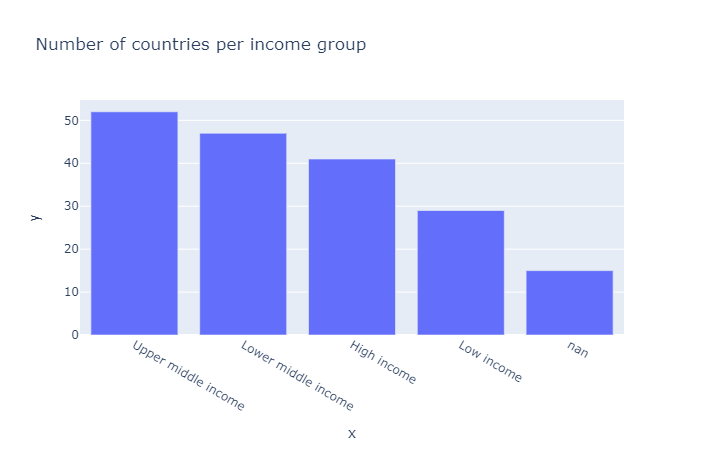

In [42]:
px.bar(y=income_group_counts,
      x=income_group_counts.index.astype(str),
       title='Number of countries per income group'
      )

In [39]:
income_group_counts.index.

Index(['Upper middle income', 'Lower middle income', 'High income',
       'Low income', 'nan'],
      dtype='object')

In [44]:
from unicodedata import lookup
lookup('LATIN CAPITAL LETTER E')

'E'

In [45]:
lookup("REGIONAL INDICATOR SYMBOL LETTER A")

'🇦'

In [47]:
from unicodedata import lookup
country_codes = country[country['is_country']]['2-alpha code'].dropna().str.lower().tolist()
country_codes[:5]

['af', 'ao', 'al', 'ar', 'am']

In [48]:
def flag(letters):
    if pd.isna(letters) or (letters.lower() not in country_codes):
        return ''
    L0 = lookup(f'REGIONAL INDICATOR SYMBOL LETTER {letters[0]}')
    L1 = lookup(f'REGIONAL INDICATOR SYMBOL LETTER {letters[1]}')
    return L0 + L1

In [49]:
print(*[flag(c) for c in country_codes])

🇦🇫 🇦🇴 🇦🇱 🇦🇷 🇦🇲 🇦🇺 🇦🇹 🇦🇿 🇧🇮 🇧🇪 🇧🇯 🇧🇫 🇧🇩 🇧🇬 🇧🇦 🇧🇾 🇧🇿 🇧🇴 🇧🇷 🇧🇹 🇧🇼 🇨🇫 🇨🇦 🇨🇭 🇨🇱 🇨🇳 🇨🇮 🇨🇲 🇨🇩 🇨🇬 🇨🇴 🇰🇲 🇨🇻 🇨🇷 🇨🇾 🇨🇿 🇩🇪 🇩🇯 🇩🇰 🇩🇴 🇩🇿 🇪🇨 🇪🇬 🇪🇷 🇪🇸 🇪🇪 🇪🇹 🇫🇮 🇫🇯 🇫🇷 🇫🇲 🇬🇦 🇬🇧 🇬🇪 🇬🇭 🇬🇳 🇬🇲 🇬🇼 🇬🇶 🇬🇷 🇬🇹 🇬🇾 🇭🇳 🇭🇷 🇭🇹 🇭🇺 🇮🇩 🇮🇳 🇮🇪 🇮🇷 🇮🇶 🇮🇸 🇮🇱 🇮🇹 🇯🇲 🇯🇴 🇯🇵 🇰🇿 🇰🇪 🇰🇬 🇰🇭 🇰🇮 🇰🇷 🇱🇦 🇱🇧 🇱🇷 🇱🇨 🇱🇰 🇱🇸 🇱🇹 🇱🇺 🇱🇻 🇲🇦 🇲🇩 🇲🇬 🇲🇻 🇲🇽 🇲🇰 🇲🇱 🇲🇹 🇲🇲 🇲🇪 🇲🇳 🇲🇿 🇲🇷 🇲🇺 🇲🇼 🇲🇾 🇳🇦 🇳🇪 🇳🇬 🇳🇮 🇳🇱 🇳🇴 🇳🇵 🇵🇰 🇵🇦 🇵🇪 🇵🇭 🇵🇼 🇵🇬 🇵🇱 🇵🇹 🇵🇾 🇵🇸 🇷🇴 🇷🇺 🇷🇼 🇸🇩 🇸🇳 🇸🇧 🇸🇱 🇸🇻 🇷🇸 🇸🇸 🇸🇹 🇸🇷 🇸🇰 🇸🇮 🇸🇪 🇸🇿 🇸🇨 🇸🇾 🇹🇩 🇹🇬 🇹🇭 🇹🇯 🇹🇲 🇹🇱 🇹🇴 🇹🇹 🇹🇳 🇹🇷 🇹🇻 🇹🇿 🇺🇬 🇺🇦 🇺🇾 🇺🇸 🇺🇿 🇻🇪 🇻🇳 🇻🇺 🇼🇸 🇽🇰 🇾🇪 🇿🇦 🇿🇲 🇿🇼


In [50]:
country['flag'] = [flag(code) for code in country['2-alpha code']]

In [51]:
country[['Short Name', 'flag', 'is_country']].sample(10)

,Short Name,flag,is_country
106,Mexico,🇲🇽,True
11,Burkina Faso,🇧🇫,True
50,Fragile and conflict affected situations,,False
54,Micronesia,🇫🇲,True
142,Solomon Islands,🇸🇧,True
139,South Asia,,False
44,Ecuador,🇪🇨,True
1,Angola,🇦🇴,True
111,Myanmar,🇲🇲,True
138,Rwanda,🇷🇼,True


In [53]:
country_series = pd.read_csv('../data/PovStatsCountry-Series.csv')
print(country_series.shape)
country_series.head()

(169, 4)


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,AFG,SP.POP.TOTL,Data source: United Nations World Population P...,NaN
1,AGO,SP.POP.TOTL,Data source: United Nations World Population P...,NaN
2,ALB,SP.POP.TOTL,"Data source: Institute of Statistics, Eurostat",NaN
3,ARG,SP.POP.TOTL,Data source: National Institute of Statistics ...,NaN
4,ARM,SP.POP.TOTL,Data source: United Nations World Population P...,NaN


## Footnote

In [60]:
footnote = pd.read_csv('../data/PovStatsFootNote.csv')
footnote = footnote.drop('Unnamed: 4', axis=1)
footnote['Year'] = footnote['Year'].str[2:].astype(int)
footnote.columns = ['Country Code', 'Series Code', 'year', 'footnote']
footnote

,Country Code,Series Code,year,footnote
0,AFG,SI.POV.NAHC,2007,Source: National Statictis and Information Aut...
1,AFG,SI.POV.NAHC,2011,Source: National Statictis and Information Aut...
2,AFG,SI.POV.NAHC,2016,Source: National Statictis and Information Aut...
3,AFG,SI.POV.NAHC.NC,2007,Source: National Statictis and Information Aut...
4,AFG,SI.POV.NAHC.NC,2011,Source: National Statictis and Information Aut...
...,...,...,...,...
33472,ZWE,SI.POV.NAHC.NC,2011,"Source: PICES 2011/12, Poverty and Poverty Dat..."
33473,ZWE,SI.POV.NOP1,2011,Estimated from grouped consumption data.
33474,ZWE,SI.POV.UMIC,2011,Estimated from grouped consumption data.
33475,ZWE,SI.POV.UMIC.GP,2011,Estimated from grouped consumption data.


## the data file

In [62]:
data = pd.read_csv('../data/PovStatsData.csv')
data = data.drop('Unnamed: 50', axis=1)
print(data.shape)
data.sample(3)

(11840, 50)


,Country Name,Country Code,Indicator Name,Indicator Code,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3334,Croatia,HRV,Growth component of change in poverty at $1.90...,SI.POV.DDAY.GR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8508,Panama,PAN,Urban poverty gap at national poverty lines (%),SI.POV.URGP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4593,Georgia,GEO,Redistribution component of change in poverty ...,SI.POV.DDAY.RE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data.loc[:, '1974'].isna().mean()

0.9816722972972973

### wide format vs long (tidy) format

In [96]:
df = pd.DataFrame({
    'country': ['country_A', 'country_B'],
    'indicator': ['indicator 1', 'indicator 1'],
    '2015': [100, 10],
    '2020': [120, 15]
})
df.style.set_caption('<b>Wide format</b>')

,country,indicator,2015,2020
0,country_A,indicator 1,100,120
1,country_B,indicator 1,10,15


In [97]:
melted = df.melt(id_vars=['country', 'indicator'], value_vars=['2015', '2020'], var_name='year')
melted.style.set_caption('<b>Long (tidy) format</b>')

,country,indicator,year,value
0,country_A,indicator 1,2015,100
1,country_B,indicator 1,2015,10
2,country_A,indicator 1,2020,120
3,country_B,indicator 1,2020,15


In [99]:
(melted
    .pivot(index=['country', 'indicator'],
          columns='year', values='value')
    .reset_index()
    .style.set_caption('<b>Povited (wide) format</b>')
)


year,country,indicator,2015,2020
0,country_A,indicator 1,100,120
1,country_B,indicator 1,10,15


In [92]:
id_vars = ['Country Name', 'Country Code', 'Indicator Name',
          'Indicator Code']
data_melt = data.melt(id_vars=id_vars,
                     var_name='year').dropna(subset=['value'])
data_melt['year'] = data_melt['year'].astype(int)
print(data_melt.shape)
data_melt.sample(10)

(44417, 6)


,Country Name,Country Code,Indicator Name,Indicator Code,year,value
409051,Lebanon,LBN,"Population, total",SP.POP.TOTL,2008,4764741.0
228059,"Congo, Dem. Rep.",COD,"Population, total",SP.POP.TOTL,1993,38815834.0
176347,Togo,TGO,"Population, total",SP.POP.TOTL,1988,3577468.0
485132,Vietnam,VNM,Income share held by lowest 10%,SI.DST.FRST.10,2014,2.7
448664,Togo,TGO,Number of poor at $1.90 a day (2011 PPP) (mill...,SI.POV.NOP1,2011,3.6
349979,Liberia,LBR,"Population, total",SP.POP.TOTL,2003,3077058.0
278222,Jordan,JOR,Income share held by second 20%,SI.DST.02ND.20,1997,11.4
476505,China,CHN,Number of poor at $3.20 a day (2011 PPP) (mill...,SI.POV.LMIC.NO,2014,129.5
419785,Indonesia,IDN,Income share held by fourth 20%,SI.DST.04TH.20,2009,21.1
366832,West Bank and Gaza,PSE,Poverty headcount ratio at national poverty li...,SI.POV.NAHC.NC,2004,25.9


In [102]:
data_pivot = data_melt.pivot(
    index=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    columns='year',
    values='value'
).reset_index()
data_pivot

year,Country Name,Country Code,Indicator Name,Indicator Code,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.00,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.00,37172386.0,NaN
1,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7,NaN,NaN,NaN,38.30,NaN,NaN,NaN,NaN,54.5,NaN,NaN,NaN
2,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC.NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7,NaN,NaN,NaN,38.30,NaN,NaN,NaN,NaN,54.5,NaN,NaN,NaN
3,Albania,ALB,Annualized growth in per capita real survey me...,SI.SPR.PC40.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.46,NaN,NaN
4,Albania,ALB,Annualized growth in per capita real survey me...,SI.SPR.PT10.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.23,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,Zimbabwe,ZWE,Poverty headcount ratio at national poverty li...,SI.POV.NAHC.NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.6,NaN,NaN,NaN,NaN,NaN,70.9,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.30,NaN,NaN,NaN,NaN,NaN,70.00,NaN,NaN
6674,Zimbabwe,ZWE,"Survey mean consumption or income per capita, ...",SI.SPR.PC40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.86,NaN,NaN,NaN,NaN,NaN,1.48,NaN,NaN
6675,Zimbabwe,ZWE,"Survey mean consumption or income per capita, ...",SI.SPR.PT10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.39,NaN,NaN,NaN,NaN,NaN,13.62,NaN,NaN
6676,Zimbabwe,ZWE,"Survey mean consumption or income per capita, ...",SI.SPR.PT60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.84,NaN,NaN,NaN,NaN,NaN,5.54,NaN,NaN


In [104]:
data_pivot = data_melt.pivot(index=['Country Name', 'Country Code', 'year'], 
                             columns='Indicator Name',
                             values='value').reset_index()

print(data_pivot.shape)
data_pivot.sample(5)

(8287, 57)


Indicator Name,Country Name,Country Code,year,"Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, top 10% (%)","Annualized growth in per capita real survey mean consumption or income, top 60% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)",Annualized growth in per capita real survey median income or consumption expenditure (%),GINI index (World Bank estimate),Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change),Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change),Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Median daily per capita income or consumption expenditure (2011 PPP),"Multidimensional poverty, Drinking water (% of population deprived)","Multidimensional poverty, Educational attainment (% of population deprived)","Multidimensional poverty, Educational enrollment (% of population deprived)","Multidimensional poverty, Electricity (% of population deprived)","Multidimensional poverty, Headcount ratio (% of population)","Multidimensional poverty, Monetary poverty (% of population deprived)","Multidimensional poverty, Sanitation (% of population deprived)",Number of poor at $1.90 a day (2011 PPP) (millions),Number of poor at $3.20 a day (2011 PPP) (millions),Number of poor at $5.50 a day (2011 PPP) (millions),"Population, total",Poverty gap at $1.90 a day (2011 PPP) (%),Poverty gap at $3.20 a day (2011 PPP) (% of population),Poverty gap at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Poverty headcount ratio at $1.90 a day, Female (2011 PPP) (% of female population)","Poverty headcount ratio at $1.90 a day, Male (2011 PPP) (% of male population)","Poverty headcount ratio at $1.90 a day, age 0-14 (2011 PPP) (% of population age 0-14)","Poverty headcount ratio at $1.90 a day, age 15-64 (2011 PPP) (% of population age 15-64)","Poverty headcount ratio at $1.90 a day, age 65+ (2011 PPP) (% of population age 65+)","Poverty headcount ratio at $1.90 a day, rural (2011 PPP) (% of rural population)","Poverty headcount ratio at $1.90 a day, urban (2011 PPP) (% of urban population)","Poverty headcount ratio at $1.90 a day, with primary education (2011 PPP) (% of population age 16+ with primary education)","Poverty headcount ratio at $1.90 a day, with secondary education (2011 PPP) (% of population age 16+ with secondary education)","Poverty headcount ratio at $1.90 a day, without education (2011 PPP) (% of population age 16+ without education)","Poverty headcount ratio at $1.90 a day, with Tertiary/post-secondary education (2011 PPP) (% of population age 16+ with Tertiary/post-secondary education)",Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Poverty headcount ratio at national poverty lines (% of population), including noncomparable values",Redistribution component of change in poverty at $1.90 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $3.20 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $5.50 a day (2011 PPP) (% of change),"Survey mean consumption or income per capita, bottom 40% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 10% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 60% (2011 PPP $ per day)","Survey mean consumption or income per capita, total population (2011 PPP $ per day)"
6846,St. Lucia,LCA,2002,NaN,NaN,NaN,NaN,NaN,NaN,

In [106]:
data_pivot[['Country Code', 'year']].duplicated().any()

False

### merging DataFrames

In [107]:
left = melted
left.style.set_caption('df: "left"')

,country,indicator,year,value
0,country_A,indicator 1,2015,100
1,country_B,indicator 1,2015,10
2,country_A,indicator 1,2020,120
3,country_B,indicator 1,2020,15


In [109]:
right = pd.DataFrame({
    'country': ['country_A', 'country_B'],
    'continent': ['Asia', 'Europe'],
    'group': ['low income', 'high income']
})
right.style.set_caption('df: "right"')

,country,continent,group
0,country_A,Asia,low income
1,country_B,Europe,high income


In [110]:
pd.merge(left=left, right=right,
        left_on='country',
        right_on='country',
        how='left')

,country,indicator,year,value,continent,group
0,country_A,indicator 1,2015,100,Asia,low income
1,country_B,indicator 1,2015,10,Europe,high income
2,country_A,indicator 1,2020,120,Asia,low income
3,country_B,indicator 1,2020,15,Europe,high income


In [114]:
poverty = pd.merge(data_pivot, country,
                  left_on='Country Code',
                  right_on='Country Code',
                  how='left'
                  )
print(poverty.shape)
poverty

(8287, 89)


,Country Name,Country Code,year,"Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, top 10% (%)","Annualized growth in per capita real survey mean consumption or income, top 60% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)",Annualized growth in per capita real survey median income or consumption expenditure (%),GINI index (World Bank estimate),Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change),Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change),Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Median daily per capita income or consumption expenditure (2011 PPP),"Multidimensional poverty, Drinking water (% of population deprived)","Multidimensional poverty, Educational attainment (% of population deprived)","Multidimensional poverty, Educational enrollment (% of population deprived)","Multidimensional poverty, Electricity (% of population deprived)","Multidimensional poverty, Headcount ratio (% of population)","Multidimensional poverty, Monetary poverty (% of population deprived)","Multidimensional poverty, Sanitation (% of population deprived)",Number of poor at $1.90 a day (2011 PPP) (millions),Number of poor at $3.20 a day (2011 PPP) (millions),Number of poor at $5.50 a day (2011 PPP) (millions),"Population, total",Poverty gap at $1.90 a day (2011 PPP) (%),Poverty gap at $3.20 a day (2011 PPP) (% of population),Poverty gap at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Poverty headcount ratio at $1.90 a day, Female (2011 PPP) (% of female population)","Poverty headcount ratio at $1.90 a day, Male (2011 PPP) (% of male population)","Poverty headcount ratio at $1.90 a day, age 0-14 (2011 PPP) (% of population age 0-14)","Poverty headcount ratio at $1.90 a day, age 15-64 (2011 PPP) (% of population age 15-64)","Poverty headcount ratio at $1.90 a day, age 65+ (2011 PPP) (% of population age 65+)","Poverty headcount ratio at $1.90 a day, rural (2011 PPP) (% of rural population)","Poverty headcount ratio at $1.90 a day, urban (2011 PPP) (% of urban population)","Poverty headcount ratio at $1.90 a day, with primary education (2011 PPP) (% of population age 16+ with primary education)","Poverty headcount ratio at $1.90 a day, with secondary education (2011 PPP) (% of population age 16+ with secondary education)","Poverty headcount ratio at $1.90 a day, without education (2011 PPP) (% of population age 16+ without education)","Poverty headcount ratio at $1.90 a day, with Tertiary/post-secondary education (2011 PPP) (% of population age 16+ with Tertiary/post-secondary education)",Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Poverty headcount ratio at national poverty lines (% of population), including noncomparable values",Redistribution component of change in poverty at $1.90 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $3.20 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $5.50 a day (2011 PPP) (% of change),"Survey mean consumption or income per capita, bottom 40% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 10% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 60% (2011 PPP $ per day)","Survey mean consumption or income per capita, total population (2011 PPP $ per day)",Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Spe

In [115]:
poverty[['Country Code', 'year']].duplicated().any()

False

### Learning Plotly Express

In [116]:
df = pd.DataFrame({
    'numbers': [1, 2, 3, 4, 5, 6, 7, 8],
    'colors': ['blue', 'green', 'orange', 'yellow', 'black', 'gray', 'pink', 'white'],
    'floats': [1.1, 1.2, 1.3, 2.4, 2.1, 5.6, 6.2, 5.3],
    'shapes': ['rectangle', 'circle', 'triangle', 'rectangle', 'circle', 'triangle', 'rectangle', 'circle'],
    'letters': list('AAABBCCC')
})

df

,numbers,colors,floats,shapes,letters
0,1,blue,1.1,rectangle,A
1,2,green,1.2,circle,A
2,3,orange,1.3,triangle,A
3,4,yellow,2.4,rectangle,B
4,5,black,2.1,circle,B
5,6,gray,5.6,triangle,C
6,7,pink,6.2,rectangle,C
7,8,white,5.3,circle,C


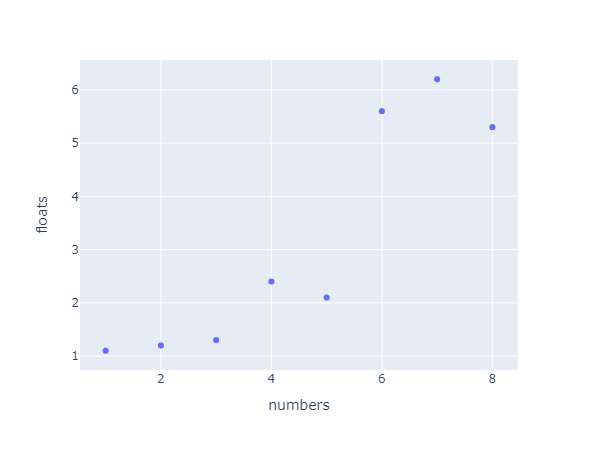

In [117]:
px.scatter(df, x='numbers', y='floats')

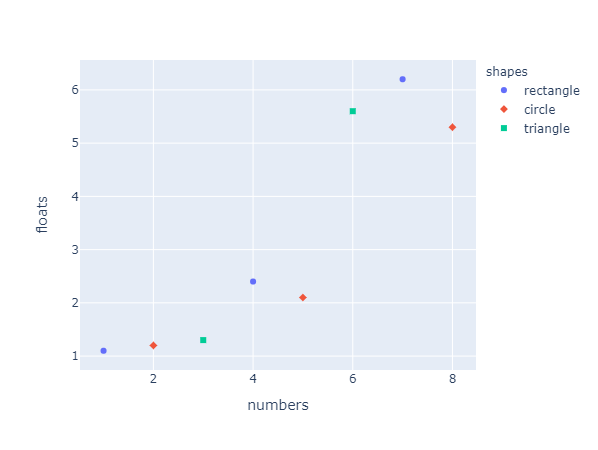

In [121]:
px.scatter(df, x='numbers', y='floats',
          color='shapes',
          symbol='shapes')

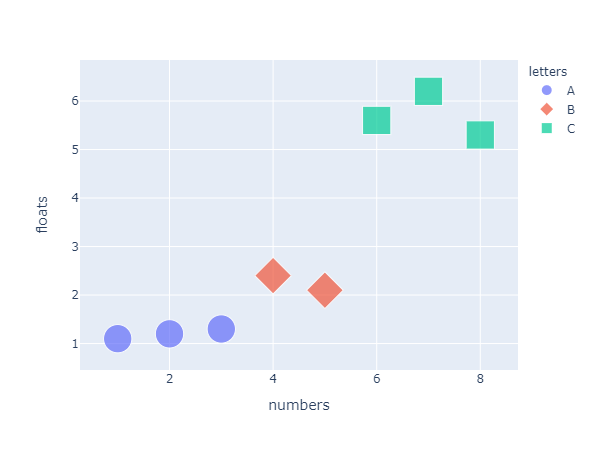

In [122]:
px.scatter(df,
          x='numbers',
          y='floats',
          color='letters',
          symbol='letters',
          size=[35]*8)

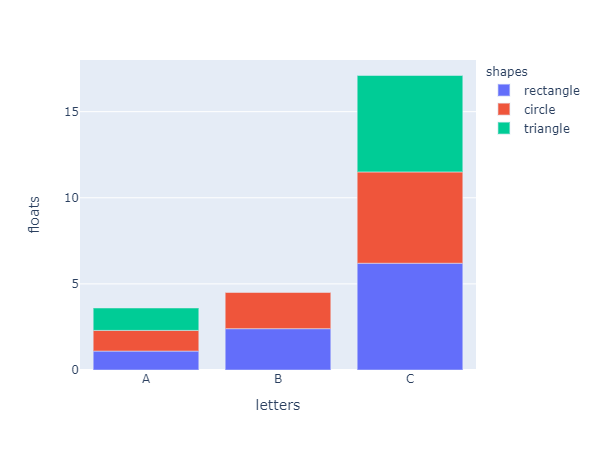

In [125]:
px.bar(df, x='letters', y='floats', color='shapes',
      barmode='stack')

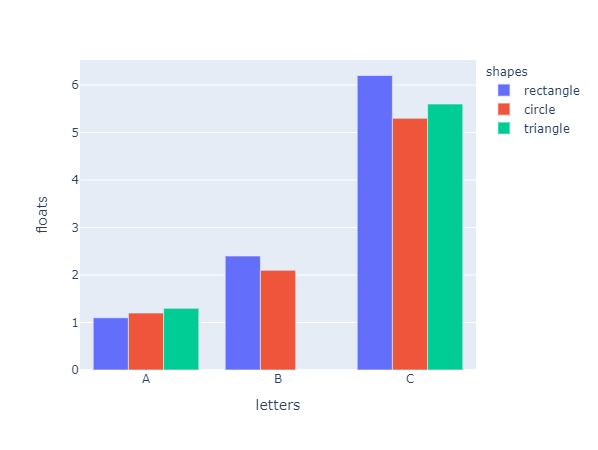

In [127]:
px.bar(df, x='letters', y='floats', color='shapes',
      barmode='group')

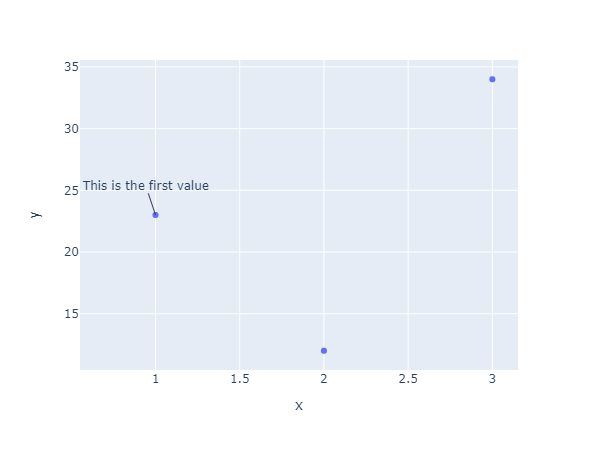

In [128]:
import plotly.express as ps
fig = px.scatter(x=[1, 2, 3], y=[23, 12, 34])
fig.add_annotation(x=1, y=23, text='This is the first value')

### Creating a Plotly Express chart using the dataset

In [129]:
poverty.head(2)

,Country Name,Country Code,year,"Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, top 10% (%)","Annualized growth in per capita real survey mean consumption or income, top 60% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)",Annualized growth in per capita real survey median income or consumption expenditure (%),GINI index (World Bank estimate),Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change),Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change),Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Median daily per capita income or consumption expenditure (2011 PPP),"Multidimensional poverty, Drinking water (% of population deprived)","Multidimensional poverty, Educational attainment (% of population deprived)","Multidimensional poverty, Educational enrollment (% of population deprived)","Multidimensional poverty, Electricity (% of population deprived)","Multidimensional poverty, Headcount ratio (% of population)","Multidimensional poverty, Monetary poverty (% of population deprived)","Multidimensional poverty, Sanitation (% of population deprived)",Number of poor at $1.90 a day (2011 PPP) (millions),Number of poor at $3.20 a day (2011 PPP) (millions),Number of poor at $5.50 a day (2011 PPP) (millions),"Population, total",Poverty gap at $1.90 a day (2011 PPP) (%),Poverty gap at $3.20 a day (2011 PPP) (% of population),Poverty gap at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Poverty headcount ratio at $1.90 a day, Female (2011 PPP) (% of female population)","Poverty headcount ratio at $1.90 a day, Male (2011 PPP) (% of male population)","Poverty headcount ratio at $1.90 a day, age 0-14 (2011 PPP) (% of population age 0-14)","Poverty headcount ratio at $1.90 a day, age 15-64 (2011 PPP) (% of population age 15-64)","Poverty headcount ratio at $1.90 a day, age 65+ (2011 PPP) (% of population age 65+)","Poverty headcount ratio at $1.90 a day, rural (2011 PPP) (% of rural population)","Poverty headcount ratio at $1.90 a day, urban (2011 PPP) (% of urban population)","Poverty headcount ratio at $1.90 a day, with primary education (2011 PPP) (% of population age 16+ with primary education)","Poverty headcount ratio at $1.90 a day, with secondary education (2011 PPP) (% of population age 16+ with secondary education)","Poverty headcount ratio at $1.90 a day, without education (2011 PPP) (% of population age 16+ without education)","Poverty headcount ratio at $1.90 a day, with Tertiary/post-secondary education (2011 PPP) (% of population age 16+ with Tertiary/post-secondary education)",Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Poverty headcount ratio at national poverty lines (% of population), including noncomparable values",Redistribution component of change in poverty at $1.90 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $3.20 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $5.50 a day (2011 PPP) (% of change),"Survey mean consumption or income per capita, bottom 40% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 10% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 60% (2011 PPP $ per day)","Survey mean consumption or income per capita, total population (2011 PPP $ per day)",Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Spe

In [132]:
year = 2010
indicator = 'Population, total'
grouper = 'Region'

In [134]:
df = (poverty[poverty['year'].eq(year)]
     .sort_values(indicator)
     .dropna(subset=[indicator, grouper]))

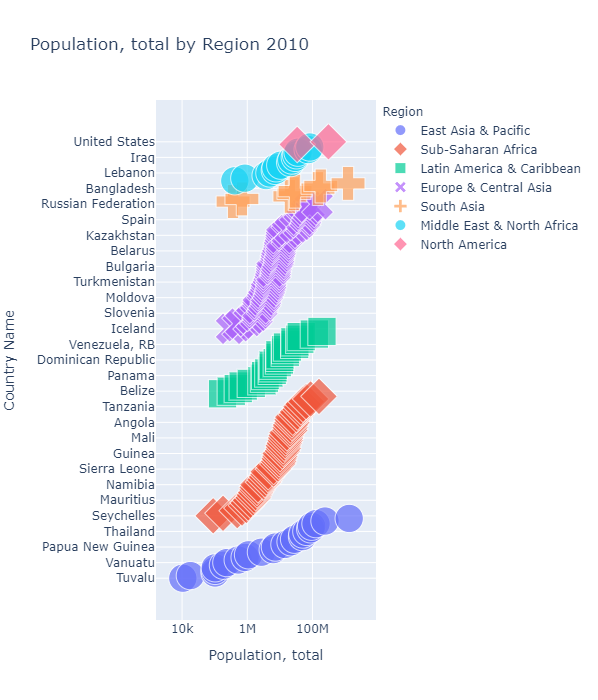

In [136]:
px.scatter(data_frame=df,
          x=indicator,
          y='Country Name',
          color=grouper,
          symbol=grouper,
          log_x=True,
          hover_name=df['Short Name'] + ' ' + df['flag'],
          size=[1] * len(df),
          title=' '.join([indicator, 'by', grouper, str(year)]),
          height=700)

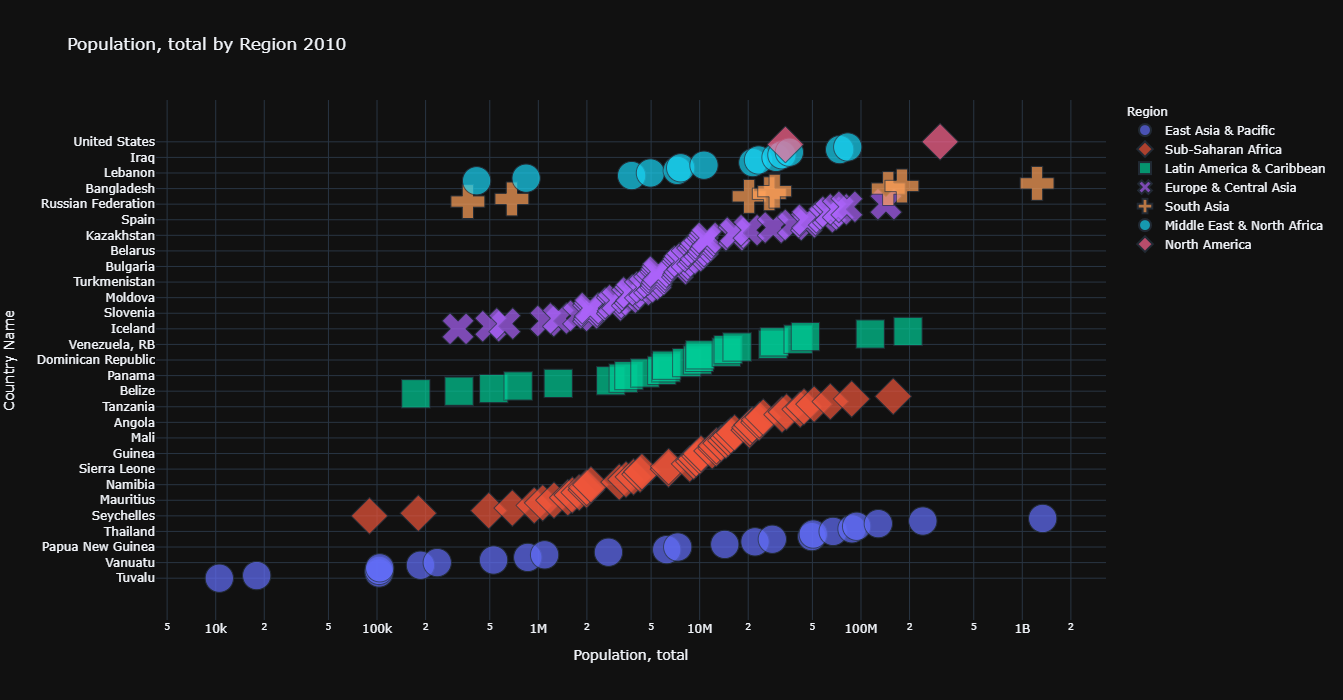

In [138]:
px.scatter(data_frame=df,
          x=indicator,
          y='Country Name',
          color=grouper,
          symbol=grouper,
          log_x=True,
          hover_name=df['Short Name'] + ' ' + df['flag'],
          size=[1] * len(df),
          title=' '.join([indicator, 'by', grouper, str(year)]),
          height=700,
          template='plotly_dark')